In [1]:
#Name: Meet Dayani
#We import the files
import pandas as pd
loan = pd.read_csv('loan-train.csv')
loan_t = pd.read_csv('loan-test.csv')


In [2]:
#Print the DataFrame to get a good view
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#Print the test data
loan_t

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
#Look at the datatypes
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
#Correlation matrix
loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [3]:
#Replacing the set terms to 0 and 1
loan['Married'] = loan.Married.replace(to_replace=['No', 'Yes'], value=[0, 1])

In [4]:
loan['Gender'] = loan.Gender.replace(to_replace=['Male', 'Female'], value=[0, 1])

In [5]:
loan['Self_Employed'] = loan.Self_Employed.replace(to_replace=['No', 'Yes'], value=[0, 1])

In [6]:
loan['Loan_Status'] = loan.Loan_Status.replace(to_replace=['N', 'Y'], value=[0, 1])

In [7]:
loan['Education'] =loan.Education.replace(to_replace=['Not Graduate', 'Graduate'], value=[0, 1])

In [8]:
#Printing the table to get a view after inserting 0 and 1
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,0.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,Urban,1


In [9]:
#Check the number of 0 
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#Replace 0 with median values
loan['Gender'].fillna((loan['Gender'].median()), inplace=True)
loan['Married'].fillna((loan['Married'].median()), inplace=True)
loan['Self_Employed'].fillna((loan['Self_Employed'].median()), inplace=True)
loan['LoanAmount'].fillna((loan['LoanAmount'].median()), inplace=True)
loan['Loan_Amount_Term'].fillna((loan['Gender'].median()), inplace=True)
loan['Credit_History'].fillna((loan['Credit_History'].median()), inplace=True)

In [11]:
#Making sure the values are replaced
loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#Convert the float values to int for better results
loan['Married'] = loan['Married'].astype(int)
loan['Gender'] = loan['Gender'].astype(int)
loan['Self_Employed'] = loan['Self_Employed'].astype(int)
loan['Credit_History'] = loan['Credit_History'].astype(int)

In [13]:
#Looking at the table for applied changes
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,128.0,360.0,1,Urban,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1,Rural,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1,Urban,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1,Urban,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1,Rural,1
610,LP002979,0,1,3+,1,0,4106,0.0,40.0,180.0,1,Rural,1
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1,Urban,1
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1,Urban,1


In [ ]:
#New correlation matrix
loan.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Gender,1.000000,-0.367389,0.045364,0.000525,-0.058809,-0.082912,-0.107930,0.049800,-0.026655,-0.017987
Married,-0.367389,1.000000,-0.017671,0.008491,0.050194,0.080496,0.145643,-0.079944,-0.023626,0.084281
Education,0.045364,-0.017671,1.000000,0.010383,0.140760,0.062290,0.166998,0.108854,0.081637,0.085884
Self_Employed,0.000525,0.008491,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.029190,-0.004994,-0.003700
ApplicantIncome,-0.058809,0.050194,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.015659,0.006986,-0.004710
CoapplicantIncome,-0.082912,0.080496,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.050329,-0.058795,-0.059187
LoanAmount,-0.107930,0.145643,0.166998,0.115260,0.565620,0.187828,1.000000,0.064539,-0.034518,-0.036416
Loan_Amount_Term,0.049800,-0.079944,0.108854,-0.029190,-0.015659,-0.050329,0.064539,1.000000,0.050131,0.007295
Credit_History,-0.026655,-0.023626,0.081637,-0.004994,0.006986,-0.058795,-0.034518,0.050131,1.000000,0.432616
Loan_Status,-0.017987,0.084281,0.085884,-0.003700,-0.004710,-0.059187,-0.036416,0.007295,0.432616,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd622b0af10>,
      dtype=object)

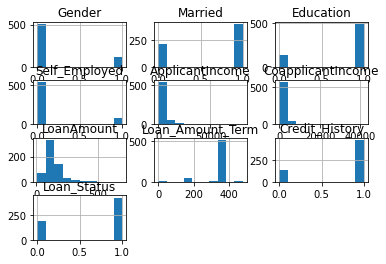

In [ ]:
#Historgrams for understanding data spread
loan.hist()

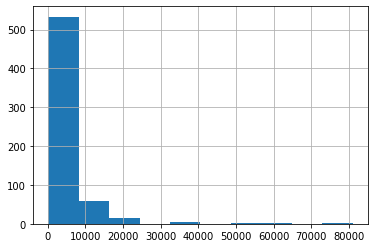

In [15]:
loan['ApplicantIncome'].hist()

In [16]:
#Applying log transformation after combining applicant and coapplicant incomes
import numpy as np
loan['AIncome'] = np.log(loan['ApplicantIncome'] + loan['CoapplicantIncome'])

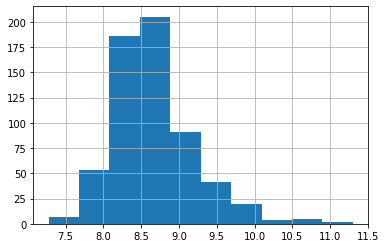

In [18]:
loan['AIncome'].hist()

In [19]:
#Relacing terms in test dataset
loan_t['Married'] = loan_t.Married.replace(to_replace=['No', 'Yes'], value=[0, 1])
loan_t['Gender'] = loan_t.Gender.replace(to_replace=['Male', 'Female'], value=[0, 1])
loan_t['Self_Employed'] = loan_t.Self_Employed.replace(to_replace=['No', 'Yes'], value=[0, 1])
loan_t['Education'] =loan_t.Education.replace(to_replace=['Not Graduate', 'Graduate'], value=[0, 1])

In [20]:
#Check null values
loan_t.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [21]:
#Replace null values with median
loan_t['Gender'].fillna((loan_t['Gender'].median()), inplace=True)
loan_t['Married'].fillna((loan_t['Married'].median()), inplace=True)
loan_t['Self_Employed'].fillna((loan_t['Self_Employed'].median()), inplace=True)
loan_t['LoanAmount'].fillna((loan_t['LoanAmount'].median()), inplace=True)
loan_t['Loan_Amount_Term'].fillna((loan_t['Gender'].median()), inplace=True)
loan_t['Credit_History'].fillna((loan_t['Credit_History'].median()), inplace=True)

In [22]:
#Converting float to int for better results
loan_t['Married'] = loan_t['Married'].astype(int)
loan_t['Gender'] = loan_t['Gender'].astype(int)
loan_t['Self_Employed'] = loan_t['Self_Employed'].astype(int)
loan_t['Credit_History'] = loan_t['Credit_History'].astype(int)

In [23]:
#Creating a copy of the dataset
loany = pd.DataFrame(loan)

In [24]:
#Printing the copy dataset
loany

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,AIncome
0,LP001002,0,0,0,1,0,5849,0.0,128.0,360.0,1,Urban,1,8.674026
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1,Rural,0,8.714568
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1,Urban,1,8.006368
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1,Urban,1,8.505323
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1,Urban,1,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1,Rural,1,7.972466
610,LP002979,0,1,3+,1,0,4106,0.0,40.0,180.0,1,Rural,1,8.320205
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1,Urban,1,9.025456
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1,Urban,1,8.933664


In [25]:
#distributing the data according to the process
y = loany["Loan_Status"]
X = loan.drop(['Loan_Status','Property_Area','Loan_ID', 'Dependents','ApplicantIncome','CoapplicantIncome'], axis = 1)


In [26]:
#Looking at the distributed dataset
X

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,AIncome
0,0,0,1,0,128.0,360.0,1,8.674026
1,0,1,1,0,128.0,360.0,1,8.714568
2,0,1,1,1,66.0,360.0,1,8.006368
3,0,1,0,0,120.0,360.0,1,8.505323
4,0,0,1,0,141.0,360.0,1,8.699515
...,...,...,...,...,...,...,...,...
609,1,0,1,0,71.0,360.0,1,7.972466
610,0,1,1,0,40.0,180.0,1,8.320205
611,0,1,1,0,253.0,360.0,1,9.025456
612,0,1,1,0,187.0,360.0,1,8.933664


In [27]:
#Train-test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [28]:
#Predicting the values using Logistic regression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))


Accuracy:  0.8311688311688312


In [30]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted   0    1
Actual            
0          19   24
1           2  109


In [33]:
#Combining applicant and coapplicant income for test dataset
loan_t['AIncome'] = np.log(loan_t['ApplicantIncome'] + loan_t['CoapplicantIncome'])

In [35]:
#Create copy of dataset
loant = pd.DataFrame(loan_t)
yt = loant
Xt = loan_t.drop(['Property_Area','Loan_ID', 'Dependents','ApplicantIncome','CoapplicantIncome'], axis = 1)

In [37]:
#Looking at the distributed test dataset
Xt

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,AIncome
0,0,1,1,0,110.0,360.0,1,8.651724
1,0,1,1,0,126.0,360.0,1,8.428581
2,0,1,1,0,208.0,360.0,1,8.824678
3,0,1,1,0,100.0,360.0,1,8.494129
4,0,0,0,0,78.0,360.0,1,8.094378
...,...,...,...,...,...,...,...,...
362,0,1,0,1,113.0,360.0,1,8.663196
363,0,1,1,0,115.0,360.0,1,8.490233
364,0,0,1,0,126.0,360.0,1,8.564649
365,0,1,1,0,158.0,360.0,1,8.908289


In [38]:
#Test split
X_testt,y_testt = train_test_split(Xt,test_size=0.25,random_state=0)

In [39]:
#Prediction for test dataset
y_predt=logistic_regression.predict(X_testt)

In [42]:
#Predicted values for test dataset
y_predt

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1])